# Decorators
To modify the behaviour of any given function

## Write a decorator function to Welcome user and thank user

In [2]:
def welcome(func):
    def wrapper(*args, **kwargs):
        print("Welcome User!")
        res = func(*args, **kwargs)
        print(f"Results : {res}")
        print("Thank you")
        return res
    return wrapper

In [3]:
@welcome
def simple_interest(p: float, n: int, r: float):
    i = (p * n * r) / 100
    a = p + i
    return i, a

In [4]:
# Positional args
r1 = simple_interest(50000.0, 5, 7.1)

Welcome User!
Results : (17750.0, 67750.0)
Thank you


In [5]:
# Keyword arguments
r2 = simple_interest(p=13000, n=5, r=11.2)

Welcome User!
Results : (7280.0, 20280.0)
Thank you


In [6]:
r3 = simple_interest(p=12000, n=5, r=7.1)

Welcome User!
Results : (4260.0, 16260.0)
Thank you


In [7]:
import math 

@welcome
def hypotenuse(a: int|float, b: int|float) -> float:
    c = math.sqrt(a**2 + b**2)
    return c

In [9]:
h1 = hypotenuse(3, 4)

Welcome User!
Results : 5.0
Thank you


In [10]:
h2 = hypotenuse(a=12, b=13)

Welcome User!
Results : 17.69180601295413
Thank you


In [11]:
h3 = hypotenuse(34, 38)

Welcome User!
Results : 50.99019513592785
Thank you


# Write a decorator to measure the time required to execute the code

In [14]:
import time

start = time.perf_counter()
time.sleep(2)
print("Hello")
time.sleep(3)
print("World!")
stop = time.perf_counter()
elapsed = stop - start
print(f"Time required : {elapsed:.2f} sec")

Hello
World!
Time required : 5.00 sec


In [15]:
def measure_time(func):
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        res = func(*args, **kwargs)
        stop = time.perf_counter()
        elapsed = stop - start
        print(f"Results : {res}")
        print(f"Elapsed time : {elapsed:.2f} sec")
        return res
    return wrapper

In [18]:
@measure_time
def square(num: int|float) -> int|float:
    time.sleep(3.5)
    return num ** 2

In [20]:
s1 = square(4)

Results : 16
Elapsed time : 3.50 sec


In [21]:
s2 = square(34.3)

Results : 1176.4899999999998
Elapsed time : 3.50 sec


In [24]:
@measure_time
def square_mul(a: list[int]) -> list[int]:
    s = []
    for i in a:
        time.sleep(1)
        print(f"Square of {i} is {i**2}")
        s.append(i**2)
    return s

In [25]:
a = [1, 2, 3, 4, 5]
s = square_mul(a)

Square of 1 is 1
Square of 2 is 4
Square of 3 is 9
Square of 4 is 16
Square of 5 is 25
Results : [1, 4, 9, 16, 25]
Elapsed time : 5.01 sec


In [27]:
b = [12, 13, 14, 15, 16, 17, 18, 19, 20]
s2 = square_mul(b)


Square of 12 is 144
Square of 13 is 169
Square of 14 is 196
Square of 15 is 225
Square of 16 is 256
Square of 17 is 289
Square of 18 is 324
Square of 19 is 361
Square of 20 is 400
Results : [144, 169, 196, 225, 256, 289, 324, 361, 400]
Elapsed time : 9.03 sec


# Write a function to dowload file and measure the time required for file download

In [28]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_loan.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_loan.csv


In [29]:
url1.split("/")

['https:',
 '',
 'raw.githubusercontent.com',
 'utkarshg1',
 'Neural-Net-Datasets',
 'refs',
 'heads',
 'main',
 'train_loan.csv']

In [30]:
url1.split("/")[-1]

'train_loan.csv'

In [ ]:
from urllib.request import urlretrieve

@measure_time
def download_file(url: str):
    filename = url.split("/")[-1]
    print(f"{filename} download started ...")
    urlretrieve(url, filename)
    print(f"{filename} download completed")

In [32]:
print(url1)
download_file(url = url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_loan.csv
train_loan.csv download started ...
train_loan.csv download completed
Results : None
Elapsed time : 1.04 sec


In [33]:
import pandas as pd
df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [34]:
df.shape

(58645, 13)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

# Show avg loan_amnt by loan_intent

In [38]:
a = (
    df.groupby(by = "loan_intent")
    .agg({"loan_amnt": "mean"})
    .sort_values(by = "loan_amnt", ascending=False)
    .round(2)
)

In [39]:
a

,loan_amnt
loan_intent,
HOMEIMPROVEMENT,10224.01
VENTURE,9262.83
PERSONAL,9239.80
DEBTCONSOLIDATION,9150.31
EDUCATION,9051.68
MEDICAL,8819.99


<Axes: xlabel='loan_intent'>

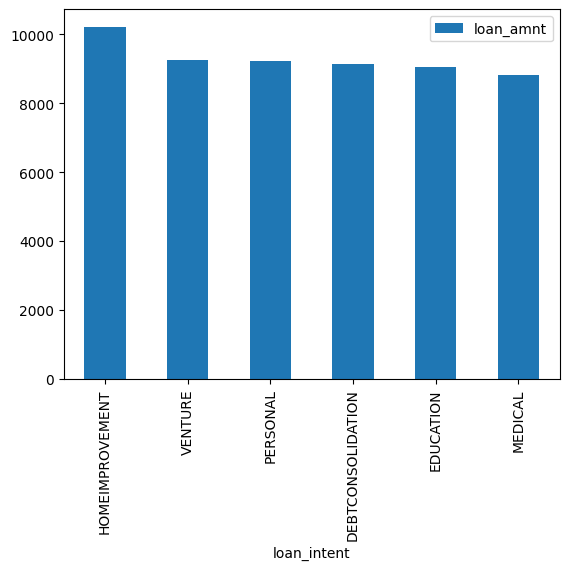

In [40]:
a.plot(kind="bar")